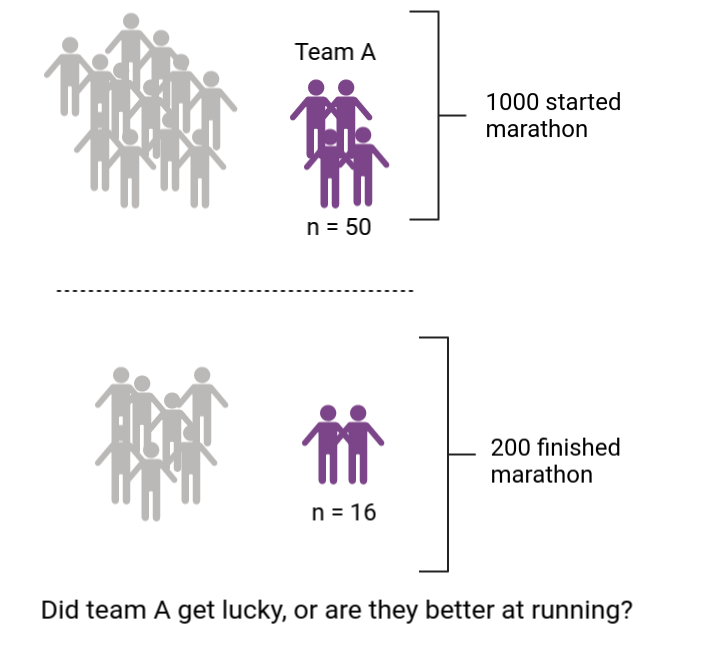

In [1]:
from IPython.display import Image
from matplotlib import style
style.use('dark_background')
Image("runners.png", width = 300)

In [2]:
from scipy import stats
import seaborn as sns

In [3]:
total_runners = 1000
number_team_A = 50
number_winners = 200
number_win_from_A = 16

In [4]:
#probability exactly 16  by chance
stats.hypergeom.pmf(number_win_from_A, total_runners, number_winners, number_team_A)

0.015078915667148978

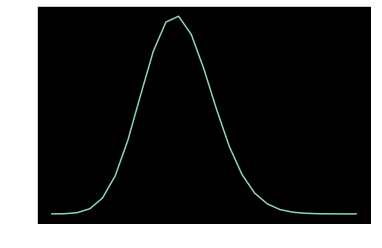

In [5]:
#probability 0-25 runners from A finish marathon by random chance (could go to 50, but prob approaches 0 around 25)
pmf = range(0,25)
pmf = list(map(lambda x: stats.hypergeom.pmf(x, total_runners, number_winners, number_team_A), pmf))
ax = sns.lineplot(x = range(0,25), y = pmf)

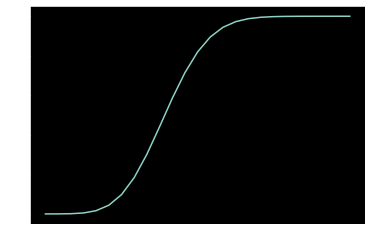

In [6]:
#probability that at most x runners finished from team A: summation of all previous points in the pmf plot
cdf = range(0,25)
cdf = list(map(lambda x: stats.hypergeom.cdf(x, total_runners, number_winners, number_team_A), cdf))
ax = sns.lineplot(x = range(0,25), y = cdf)

In [7]:
#p-value
#to figure out the probability of 16 happening, we need:
#probability that fewer than 16 from team A finished : prob(1) + prob(2) + ... + prob(15)  --- reason we subract 1 from number_win_from_A
#now to find out the probability that at least 16 finished by chance, we subract the cdf at 15 from 1 for the p-value
1 - stats.hypergeom.cdf(number_win_from_A-1, total_runners, number_winners, number_team_A)

0.02741029730966371

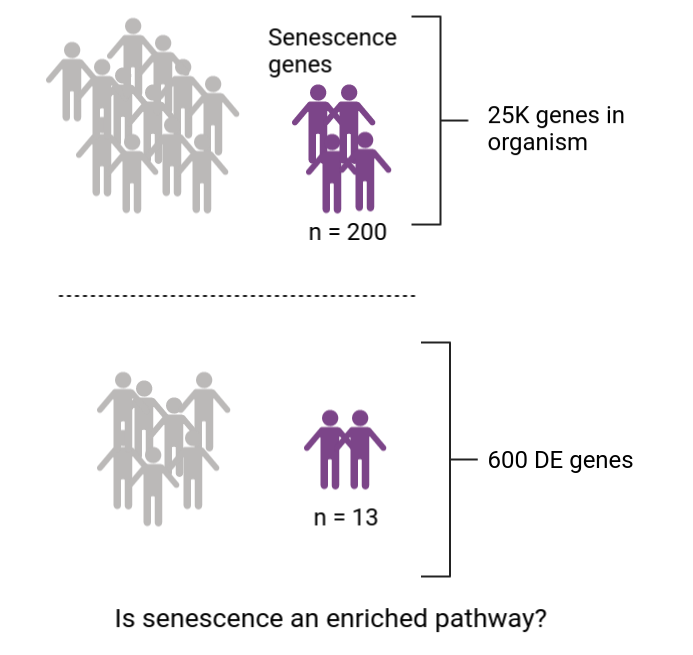

In [8]:
#common gene enrichment example
Image("genes.png", width = 300)

In [9]:
#gene enrichment p-value
1 - stats.hypergeom.cdf(13-1, 25000, 600, 200)

0.0011454559407622078